In [1]:
import yfinance as yf
df = yf.download("AAPL", start="2015-01-01", end="2023-12-31")


/tmp/ipython-input-1020120603.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download("AAPL", start="2015-01-01", end="2023-12-31")
[*********************100%***********************]  1 of 1 completed


In [2]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(df[['Close']])


In [3]:
import numpy as np

X, y = [], []
for i in range(60, len(scaled_data)):
    X.append(scaled_data[i-60:i, 0])   # 60-day window
    y.append(scaled_data[i, 0])        # next day
X, y = np.array(X), np.array(y)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))  # (samples, timesteps, features)


In [5]:
train_size = int(len(X) * 0.8)   # 80% train, 20% test

X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(25))
model.add(Dense(1))  # Predict 1 value (next day's price)

model.compile(optimizer='adam', loss='mean_absolute_error')


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [11]:
history = model.fit(X, y, batch_size=32, epochs=20)


Epoch 1/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 7s 55ms/step - loss: 0.1472
Epoch 2/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 6s 72ms/step - loss: 0.0306
Epoch 3/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - loss: 0.0299
Epoch 4/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 5s 59ms/step - loss: 0.0257
Epoch 5/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 5s 70ms/step - loss: 0.0257
Epoch 6/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - loss: 0.0252
Epoch 7/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 4s 57ms/step - loss: 0.0248
Epoch 8/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 5s 59ms/step - loss: 0.0246
Epoch 9/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 5s 56ms/step - loss: 0.0251
Epoch 10/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 5s 74ms/step - loss: 0.0230
Epoch 11/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 4s 57ms/step - loss: 0.0242
Epoch 12/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 5s 57ms/step - loss: 0.0240
Epoch 13/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 6s 65ms/step - loss: 0.0250
Epoch 14/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - loss: 0.0234
Epoch 15/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - loss: 0.0232
Epoc

In [12]:
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions.reshape(-1,1))


14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step


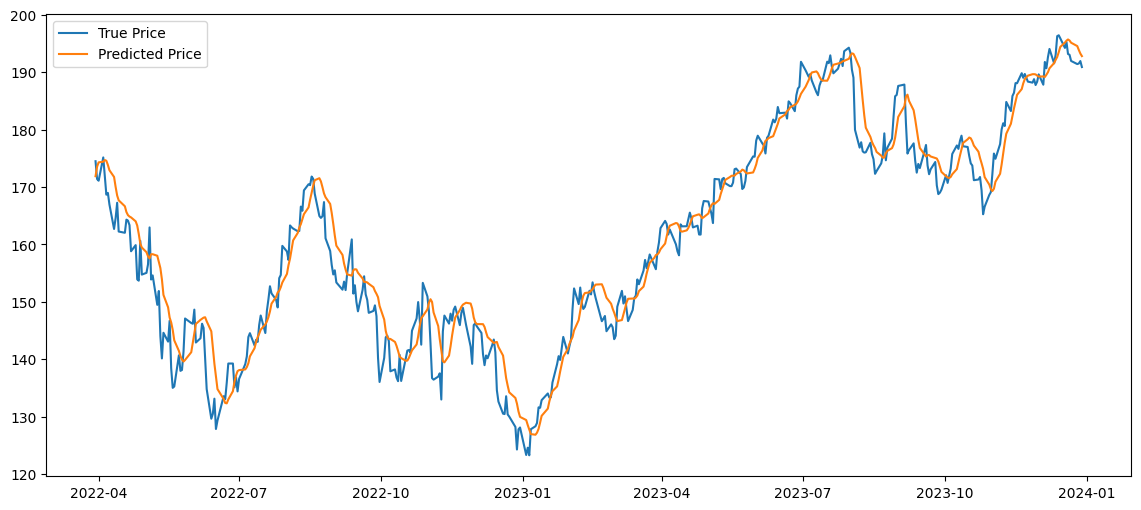

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))
plt.plot(df.index[-len(y_test):], scaler.inverse_transform(y_test.reshape(-1,1)), label="True Price")
plt.plot(df.index[-len(predictions):], predictions, label="Predicted Price")
plt.legend()
plt.show()
